# Yandex.Afisha Marketing Expense Analysis <a id='back'></a>

## Table of Contents

- [Project Introduction](#project-introduction)
    - [Analysis Outline](#analysis-outline)
    - [Results](#results)
- [Step 1: Importing Libraries and Opening Data Files](#step-1-importing-libraries-and-opening-data-files)
- [Step 2: Pre-processing the Data](#step-2-pre-processing-the-data)
    - [Pre-Processing visits_log_us](#pre-processing-visits_log_us)
    - [Pre-Processing orders_log_us](#pre-processing-orders_log_us)
    - [Pre-Processing costs](#pre-processing-costs)
- [Step 3: Data analysis](#step-3-data-analysis)
    - [Products](#products)
        - [Calculating daily sessions per user](#calculating-daily-sessions-per-user)
        - [Average session length](#average-session-length)
        - [Retention Rate](#retention-rate)
    - [Sales](#sales)
        - [Customer purchase timeframe](#customer-purchase-timeframe)
        - [Cohort Monthly Order Volume](#cohort-monthly-order-volume)
        - [Average purchase size](#average-purchase-size)
        - [Customer long term value](#customer-long-term-value)
    - [Marketing](#marketing)
        - [Total marketing cost](#total-marketing-cost)
        - [Marketings cost per source](#marketings-cost-per-source)
        - [Marketing cost per source over time](#marketing-cost-per-source-over-time)
        - [Customer acquisition cost per source](#customer-acquisition-cost-per-source)
        - [Return on marketing investment](#return-on-marketing-investment)
    
- [Conclusion](#conclusion)

## Project Introduction

As a new intern at Yandex.Afisha analytics department, I will be overlooking the marketing expenses to see if there is room for optimization.

## Analysis Outline

Products 

•	Grouped users by various timeframes (daily, weekly, monthly) to find the total number of users for that period.

•	Calculate the session frequency of daily users.

•	Calculate the length of each user session. 

•	Create monthly cohorts and calculate the user retention rate for every cohort. 

Sales 

•	Analyze the conversion timeframe from a customer’s first visit and their first purchase.

•	Calculate the total number of orders made each month for each monthly cohort.

•	Calculate the average purchase size for each monthly cohort.

•	Calculate the long-term value of each monthly cohort.

Marketing 

•	Calculate the overall, per source, and overtime of marketing cost spent.

•	Calculate customer acquisition cost from each of the sources.

•	Calculate the return on marketing investment on each monthly cohort.


## Results 

Based on the sample data, the ideal solution would be to allocate more of the marketing budget to the sources that were used to acquire the summer 17' cohorts and the September 17' cohort since those cohorts had the highest long term return on marketing investment.

[Back to Table of Contents](#back)

## Step 1: Importing Libraries and Opening Data Files

Importing the libraries that will be used for this assignment

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

Importing files for assignment

In [2]:
try:
    visits_log_us = pd.read_csv('visits_log_us.csv',
                                sep=',')
except:
    visits_log_us = pd.read_csv('/datasets/visits_log_us.csv',
                                sep=',')

In [3]:
try:
    orders_log_us = pd.read_csv('orders_log_us.csv',
                                sep=',')
except:
    orders_log_us = pd.read_csv('/datasets/orders_log_us.csv',
                                sep=',')

In [4]:
try:
    costs = pd.read_csv('costs_us.csv',
                        sep=',')
except:
    costs = pd.read_csv('/datasets/costs_us.csv',
                        sep=',')

[Back to Table of Contents](#back)

## Step 2: Pre-processing the Data

### Pre-Processing visits_log_us

Checking for duplicates, null values, and data types

In [5]:
visits_log_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


The column names are not in snakecase format and needs to be converted. FIrst we check how each column is spelled using columns.

In [6]:
print(visits_log_us.columns)

Index(['Device', 'End Ts', 'Source Id', 'Start Ts', 'Uid'], dtype='object')


After finding how each column is spelled we use the rename() method to rename the columns to snakecase format

In [7]:
visits_log_us = visits_log_us.rename(columns={'Device':'device',
                                              'End Ts':'end_ts',
                                              'Source Id':'source_id',
                                              'Start Ts':'start_ts',
                                              'Uid':'uid'})

Double checking to see if the changes was made

In [8]:
print(visits_log_us.columns)

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')


Checking for duplicate data

In [9]:
visits_log_us.duplicated().sum()

0

Checking for null values

In [10]:
visits_log_us.isnull().sum()

device       0
end_ts       0
source_id    0
start_ts     0
uid          0
dtype: int64

Checking for unique values in the 'device' column to see if we can change the data type to condense the file size

In [11]:
visits_log_us['device'].value_counts()

device
desktop    262567
touch       96833
Name: count, dtype: int64

Since there are only two unique values we can change the column data type from an object to category to save space

In [12]:
visits_log_us['device'] = visits_log_us['device'].astype('category')

Checking 'start_ts' and 'end_ts' to see what the data looks like

In [13]:
visits_log_us['start_ts'].head()

0    2017-12-20 17:20:00
1    2018-02-19 16:53:00
2    2017-07-01 01:54:00
3    2018-05-20 10:59:00
4    2017-12-27 14:06:00
Name: start_ts, dtype: object

In [14]:
visits_log_us['end_ts'].head()

0    2017-12-20 17:38:00
1    2018-02-19 17:21:00
2    2017-07-01 01:54:00
3    2018-05-20 11:23:00
4    2017-12-27 14:06:00
Name: end_ts, dtype: object

After looking at the data we can see the results are dates labeled as a string data type. Since it is an date object, we can convert it to a datetime data type to save space.

In [15]:
visits_log_us['start_ts'] = pd.to_datetime(visits_log_us['start_ts'], format='%Y-%m-%d %H:%M:%S')
visits_log_us['end_ts'] = pd.to_datetime(visits_log_us['end_ts'], format='%Y-%m-%d %H:%M:%S')

Checking the unique values to see how many different sources there are for this column

In [16]:
visits_log_us['source_id'].value_counts()

source_id
4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: count, dtype: int64

By geting unique values we can see this data set is comprised of 228,169 unique users

In [17]:
visits_log_us['uid'].nunique()

228169

Double checking to see if all of our data type conversions were saved to the dataframe and if the file size has decreased which it has

In [18]:
visits_log_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


[Back to Table of Contents](#back)

### Pre-Processing orders_log_us

Checking to see which data needs to be processed

In [19]:
orders_log_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


Getting the column names to convert it into snakecase format

In [20]:
print(orders_log_us.columns)

Index(['Buy Ts', 'Revenue', 'Uid'], dtype='object')


Renaming the columns into snakecase format

In [21]:
orders_log_us = orders_log_us.rename(columns={'Buy Ts':'buy_ts',
                                              'Revenue':'revenue',
                                              'Uid':'uid'})

Double checking to see if the changes went through

In [22]:
print(orders_log_us.columns)

Index(['buy_ts', 'revenue', 'uid'], dtype='object')


Checking for duplicates

In [23]:
orders_log_us.duplicated().sum()

0

Checking for null values

In [24]:
orders_log_us.isnull().sum()

buy_ts     0
revenue    0
uid        0
dtype: int64

Chaning the date object column into a datetime type for analysis and saving space

In [25]:
orders_log_us['buy_ts'] = pd.to_datetime(orders_log_us['buy_ts'], format='%Y-%m-%d %H:%M:%S')

Double checking to see if the changes were made

In [26]:
orders_log_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


[Back to Table of Contents](#back)

### Pre-Processing costs

Checking to see what needs to be processed

In [27]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


Checking to see if the column names were in snakecase and they were

In [28]:
print(costs.columns)

Index(['source_id', 'dt', 'costs'], dtype='object')


Noticing that this date does not have hours, minues, and seconds and so when converting it to datetime type we can leave that part out of the format= parameter

In [29]:
costs['dt'].head()

0    2017-06-01
1    2017-06-02
2    2017-06-03
3    2017-06-04
4    2017-06-05
Name: dt, dtype: object

Converting date objects to datetime

In [30]:
costs['dt'] = pd.to_datetime(costs['dt'], format='%Y-%m-%d')

Checking for duplicates

In [31]:
costs.duplicated().sum()

0

Checking for null values

In [32]:
costs.isnull().sum()

source_id    0
dt           0
costs        0
dtype: int64

Double checking to see if changes went through

In [33]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


[Back to Table of Contents](#back)

## Step 3: Data analysis

### Products

##### Calulating daily, weekly, and monthly users

Firt, we need to get the day, week, month, and yearly values from the date column

In [34]:
visits_log_us['visit_date'] = visits_log_us['start_ts'].dt.date
visits_log_us['visit_week'] = visits_log_us['start_ts'].dt.isocalendar().week
visits_log_us['visit_month'] = visits_log_us['start_ts'].dt.month
visits_log_us['visit_year'] = visits_log_us['start_ts'].dt.year

After getting the daily, weekly, monthly, and yearly values we can start to group the data into daily, weekly, and monthly users

To get the daily active users we group our data by the day date and get the unique number of users

In [35]:
dau_total = visits_log_us.groupby('visit_date').agg({'uid':'nunique'}).mean()

In [36]:
dau_total_graph = visits_log_us.groupby('visit_date').agg({'uid':'nunique'})

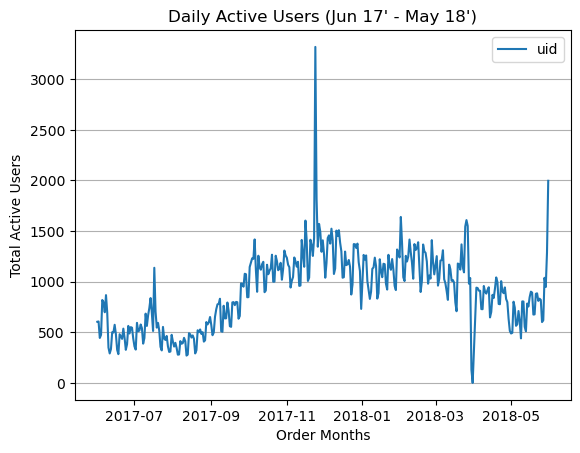

In [37]:
dau_total_graph.plot(kind='line',
                     title='Daily Active Users (Jun 17\' - May 18\')',
                     xlabel='Order Months',
                     ylabel='Total Active Users')
plt.grid(axis='y')
plt.show()

From the daily active users it shows three different spikes in the dataset which we should look into to see what event could have caused this annomaly

To get the weekly active users we first group our data by the year, and week value to get users from that time span. After that, we count the unique number of users to get the weekly active users.

In [38]:
wau_total = visits_log_us.groupby(['visit_year','visit_week']).agg({'uid':'nunique'}).mean()

In [39]:
wau_total_graph = visits_log_us.groupby(['visit_year','visit_week']).agg({'uid':'nunique'})

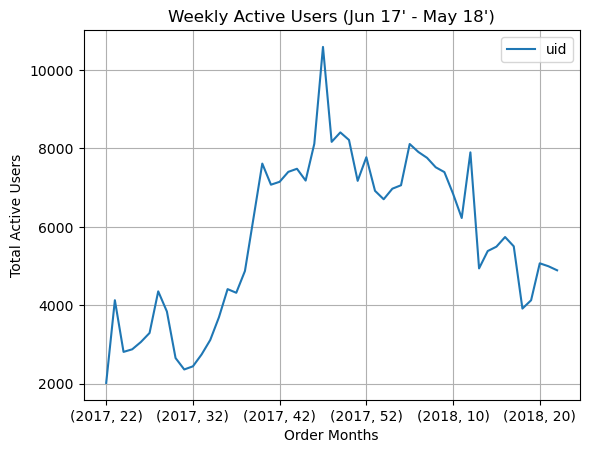

In [40]:
wau_total_graph.plot(kind='line',
                     title='Weekly Active Users (Jun 17\' - May 18\')',
                     xlabel='Order Months',
                     ylabel='Total Active Users')
plt.grid()
plt.show()

Based on the weekly data it shows that in Q4 there is a naturally large spike in active users most likely due to seasonality

To get the monthly active users we first group our data by the year and month value to get users from that time span. After that, we count the unique number of users to get the monthly active users.

In [41]:
mau_total = visits_log_us.groupby(['visit_year','visit_month']).agg({'uid':'nunique'}).mean()

In [42]:
mau_total_graph = visits_log_us.groupby(['visit_year','visit_month']).agg({'uid':'nunique'})

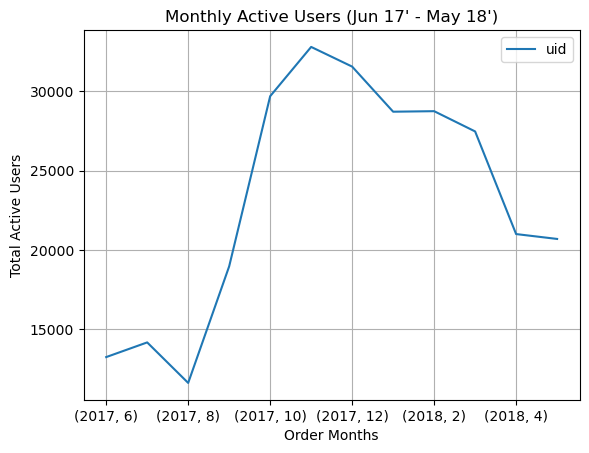

In [43]:
mau_total_graph.plot(kind='line',
                     title='Monthly Active Users (Jun 17\' - May 18\')',
                     xlabel='Order Months',
                     ylabel='Total Active Users')
plt.grid()
plt.show()

From the monthly graph it shows a long 6+ month decline in monthly active users showing that users will check in most weeks but not every week leading to lower monthly user activity

In [44]:
print('Average daily active users:', dau_total.round())
print('Average weekly active users:', wau_total.round())
print('Average monthly active users:', mau_total.round())

Average daily active users: uid    908.0
dtype: float64
Average weekly active users: uid    5716.0
dtype: float64
Average monthly active users: uid    23228.0
dtype: float64


We can see that there are about 908 daily users, 5716 weekly users, and 23,228 monthly users

[Back to Table of Contents](#back)

##### Calculating daily sessions per user

First, we need to group the users per day

In [45]:
sess_per_user = visits_log_us.groupby('visit_date').agg({'uid':['count','nunique']})

By aggrivating the values by 'count' will count the total about of visits that day and 'nunique' will show by how many unique users. Then we name these columns to calculate the number of sessions per daily user.

In [46]:
sess_per_user.columns = ['n_sessions','n_users']

Calculating the number of sessions of daily users

In [47]:
sess_per_user['sess_per_user'] = sess_per_user['n_sessions'] / sess_per_user['n_users']

In [48]:
print('Average sessions per daily user:',sess_per_user['sess_per_user'].mean())

Average sessions per daily user: 1.082169644003972


In [49]:
print('Average sessions per daily user:',sess_per_user['sess_per_user'].median())

Average sessions per daily user: 1.0824875552419868


This data shows that the median and average daily users mostly visit once a day with a few coming back multiple times. Since the average and median values are similar in length it also shows that there are not many significant outliers to skew the results.

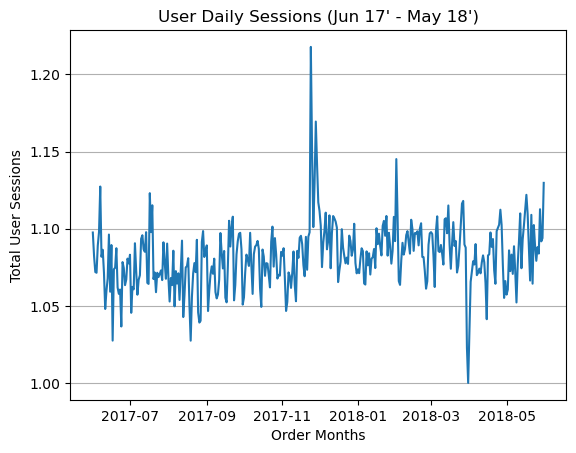

In [50]:
sess_per_user['sess_per_user'].plot(kind='line',
                                    title='User Daily Sessions (Jun 17\' - May 18\')',
                                    xlabel='Order Months',
                                    ylabel='Total User Sessions')
plt.grid(axis='y')
plt.show()

Similar to the daily active users graph, this graph shows a few spikes in the data in which we need to look into to see what events could have possible occured for this to happen

[Back to Table of Contents](#back)

##### Average session length

We can calculate the average session length by subtracting the end time value witht the start time value

In [51]:
visits_log_us['visit_duration'] = (visits_log_us['end_ts'] - visits_log_us['start_ts']).dt.seconds.mean()

In [52]:
print('Average Session Length (in seconds):', visits_log_us['visit_duration'].round().mean())

Average Session Length (in seconds): 644.0


The average session length per user is about 644 seconds or about 10 minutes and 40 seconds

[Back to Table of Contents](#back)

##### Retention Rate

To get the retention rate we first need to group all the users and get the month and year of their first visit

In [53]:
visits_log_us['month_year'] = visits_log_us['start_ts'].values.astype('datetime64[M]')

In [54]:
first_activity_month_year = visits_log_us.groupby('uid')['month_year'].min()

Naming this result to 'first_activity_month_year' so when we join the dataframes later we know that what this column is

In [55]:
first_activity_month_year.name = 'first_activity_month_year'

Joining all out data into one dataframe

In [56]:
visits_log_us = visits_log_us.join(first_activity_month_year, on='uid')

Then we can calculate the cohort lifetime by subtracting the last active month value with the first active month value

In [57]:
visits_log_us['cohort_lifetime'] = visits_log_us['month_year'] - visits_log_us['first_activity_month_year']

In [58]:
visits_log_us['cohort_lifetime'] = visits_log_us['cohort_lifetime'] / np.timedelta64(1,'M')

Converting cohort lifetime to an integer type

In [59]:
visits_log_us['cohort_lifetime'] = visits_log_us['cohort_lifetime'].round().astype('int')

Grouping the data by cohort lifetimes to get the number of active users in each cohort

In [60]:
cohorts = (visits_log_us.groupby(['first_activity_month_year','cohort_lifetime']).agg({'uid':'nunique'}).reset_index())

Filtering cohorts by cohort lifetime value and finding the total number of users in the cohort by looking at week 0

In [61]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month_year','uid']]

Renaming these users to 'cohort_users' to distinguish them from the others

In [62]:
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})

Merging the dataframes so that one has all the data we need

In [63]:
cohorts = cohorts.merge(initial_users_count, on='first_activity_month_year')

Calculating for the retention rate

In [64]:
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']

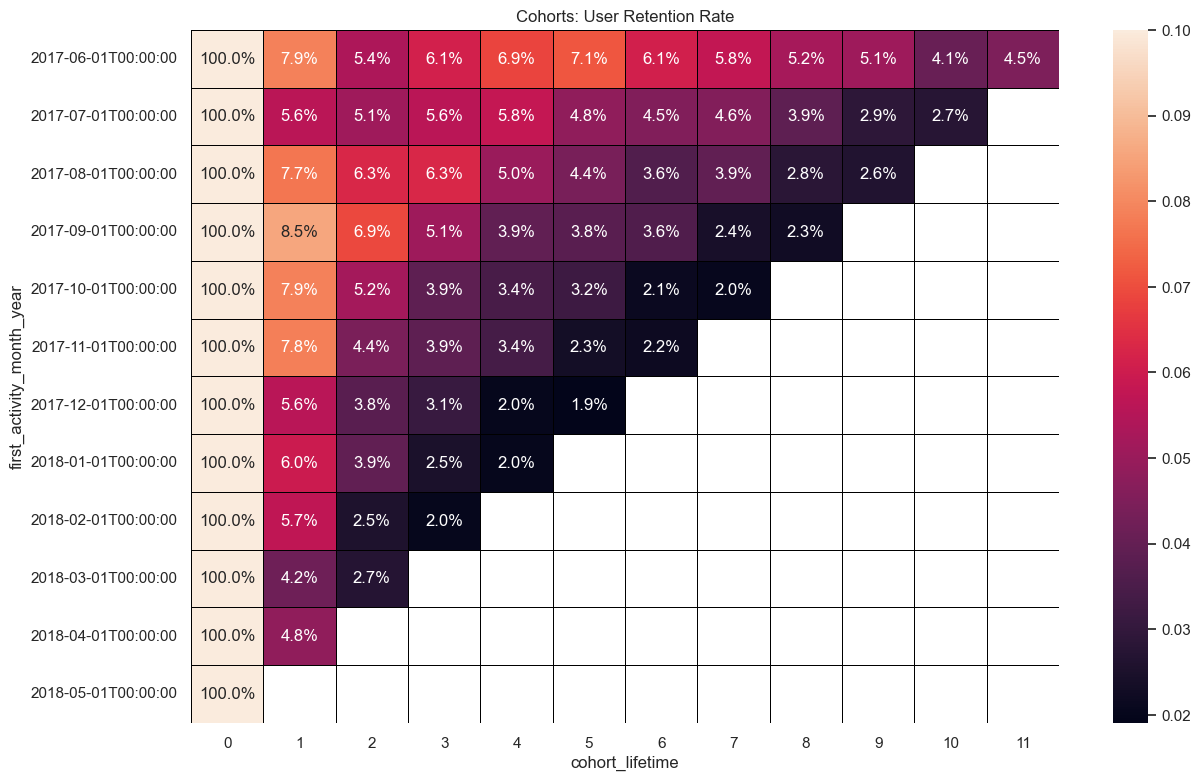

In [65]:
retention_pivot = cohorts.pivot_table(index='first_activity_month_year',
                                      columns='cohort_lifetime',
                                      values='retention',
                                      aggfunc='mean')

sns.set(style='white')
plt.figure(figsize=(14, 9))
plt.title('Cohorts: User Retention Rate')
sns.heatmap(retention_pivot,
            annot=True,
            fmt='.1%',
            linewidths=0.5,
            linecolor='black',
            vmax=.1)
plt.show()

Based on this heat map it shows that the user retention rate is high during the summer and all cohort renention rates stay elevated into the winter holiday season. When Q1 starts is when most of the older cohort retention rates start to dwindle down as that is the start of the slow season.

[Back to Table of Contents](#back)

### Sales

##### Customer purchase timeframe

To find the difference in purchase timeframe we first visit time we must first find the earliest order time for users. For all analyses involving customer purchases I will be creating a new dataframe for these analyses called "buyers". I am adding source_id to the buyers dataframe for future use and lower future memore usage.

In [66]:
buyers = orders_log_us
buyers['source_id'] = visits_log_us['source_id']

In [67]:
first_order_date = orders_log_us.groupby('uid').agg({'buy_ts':'min'}).reset_index()

In [68]:
first_order_date.columns = ['uid', 'first_order_date']

In [69]:
buyers = buyers.merge(first_order_date, on='uid')

After finding the order time we need to find the first visit time for those users

In [70]:
first_visit_date = visits_log_us.groupby('uid').agg({'start_ts':'min'}).reset_index()

In [71]:
first_visit_date.columns = ['uid', 'first_visit_date']

After finding the two time frames, now we merge them to the orders dataframe

In [72]:
buyers = buyers.merge(first_visit_date, on='uid')

Now finally we can find the difference between time of purchase and first visit time. After finding the difference we can use numpy to change the values to days.

In [73]:
buyers['order_diff'] = buyers['first_order_date'] - buyers['first_visit_date']

In [74]:
buyers['order_diff'] = buyers['order_diff'] / np.timedelta64(1,'D')

In [75]:
buyers['order_diff'].mean()

17.61735459574421

The average time between users visiting the site and ordering is about 17 days

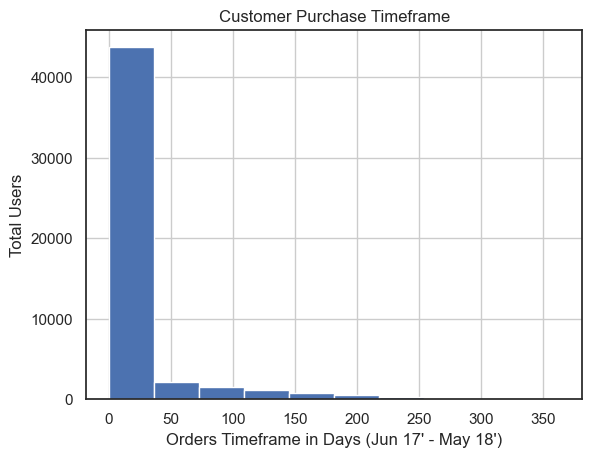

In [76]:
buyers['order_diff'].hist()

plt.xlabel('Orders Timeframe in Days (Jun 17\' - May 18\')')
plt.ylabel('Total Users')
 
plt.title('Customer Purchase Timeframe')
plt.show()

From the histogram it shows that most users who did make a purchase made the purchase within 50 days of visiting the site

[Back to Table of Contents](#back)

##### Cohort Monthly Order Volume

To find the monthly order volume we first need to convert the purchase times into datetime months and first order dates into datetime months

In [77]:
buyers['order_month'] = buyers['buy_ts'].values.astype('datetime64[M]')

In [78]:
buyers['first_order_month'] = buyers['first_order_date'].values.astype('datetime64[M]')

After converting all the datetimes into months there is one outlier point in the data that we need to remove

In [79]:
buyers['first_order_month'].tail()

50410   2018-05-01
50411   2018-05-01
50412   2018-05-01
50413   2018-05-01
50414   2018-06-01
Name: first_order_month, dtype: datetime64[s]

In [80]:
buyers = buyers.drop(50414)

In [81]:
buyers['first_order_month'].tail()

50409   2018-05-01
50410   2018-05-01
50411   2018-05-01
50412   2018-05-01
50413   2018-05-01
Name: first_order_month, dtype: datetime64[s]

To get our cohort age we subtract their first order date to their latest order date and convert the results into an integer

In [82]:
buyers['cohort_age'] = buyers['order_month'] - buyers['first_order_month']

In [83]:
buyers['cohort_age'] = buyers['cohort_age'] / np.timedelta64(1,'M')

In [84]:
buyers['cohort_age']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
50409    0.0
50410    0.0
50411    0.0
50412    0.0
50413    0.0
Name: cohort_age, Length: 50414, dtype: float64

In [85]:
buyers['cohort_age'] = buyers['cohort_age'].round().astype(int)

To get the total monthly orders we need to count all everytime there is a purchase transaction

In [86]:
total_monthly_orders = buyers.groupby(['first_order_month','order_month']).agg({'revenue':'count'}).reset_index()

In [87]:
total_monthly_orders.columns = ['first_order_month','order_month','total_monthly_orders']

In [88]:
buyers = pd.merge(buyers, total_monthly_orders, how='inner', left_on=['first_order_month','order_month'], right_on=['first_order_month','order_month'])

Creating the pivot table and heatmap for total monthly orders for our different cohorts

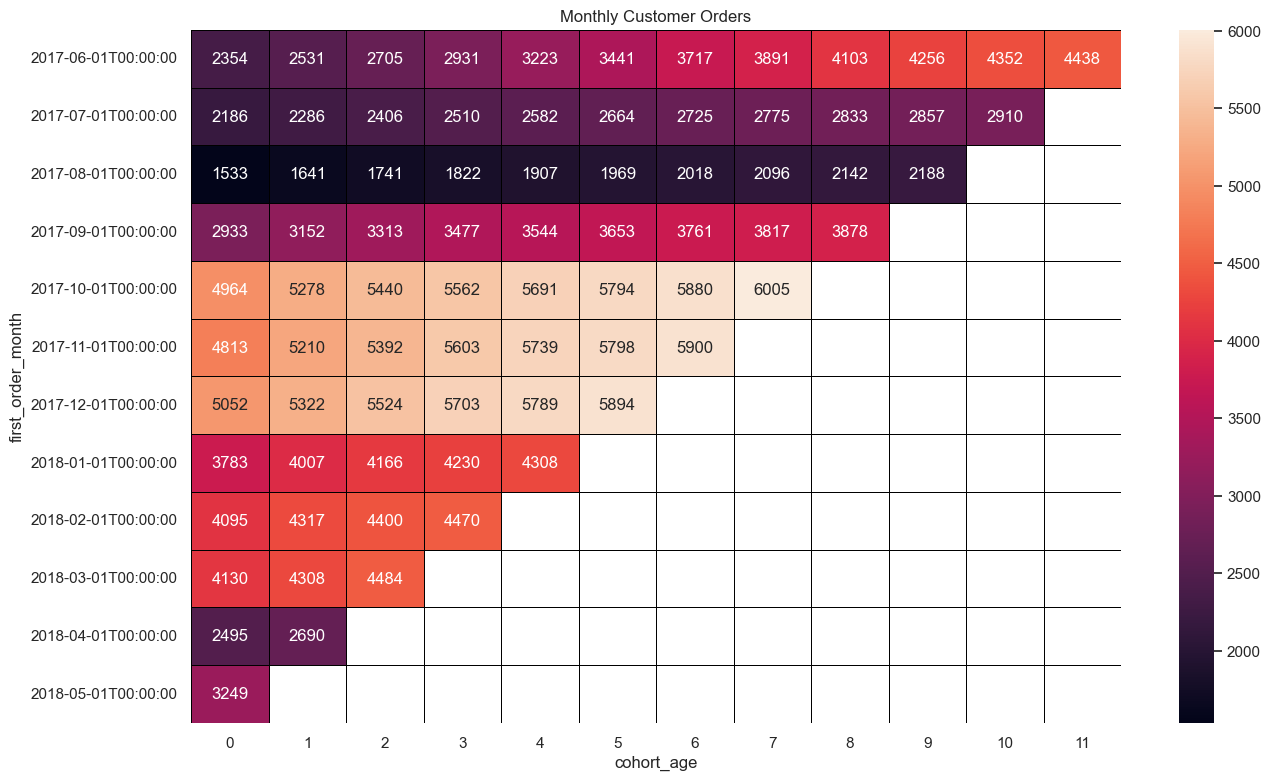

In [89]:
monthly_orders = buyers.pivot_table(index='first_order_month',
                                    columns='cohort_age',
                                    values='total_monthly_orders',
                                    aggfunc='count').cumsum(axis=1)

sns.set(style='white')
plt.figure(figsize=(15, 9))
plt.title('Monthly Customer Orders')
sns.heatmap(monthly_orders,
            annot=True,
            fmt='g',
            linewidths=0.5,
            linecolor='black')
plt.show()

Based on the pivot table, it shows that cohorts that started ordering from us during the 2017 holiday season tend to keep coming back and ordering more in the following months. It should be noted that cohorts who started purchasing from us from July and August 2017 tend to not order as much as the other cohorts even during the holiday season. Cohorts from these two months should be examined from where they came from and should be targeted less and the ones during the holiday season should be increased.

[Back to Table of Contents](#back)

##### Average purchase size

To get the average purchase size we need to find the total monthly orders and divide it by the number of unique customers

First, we find the number of orders per month, name it and add it to the buyers dataframe

In [90]:
number_of_orders = buyers.groupby(['first_order_month','order_month']).agg({'revenue':'count'}).reset_index()

In [91]:
number_of_orders.columns = ['first_order_month','order_month','number_of_orders']

In [92]:
buyers = pd.merge(buyers, number_of_orders, left_on=['first_order_month','order_month'], right_on=['first_order_month','order_month'])

Next, we find the number of unique customers, name it, and add it to the buyers dataframe

In [93]:
cohort_size = buyers.groupby('first_order_month').agg({'uid':'nunique'}).reset_index()

In [94]:
cohort_size.columns = ['first_order_month','cohort_size']

In [95]:
buyers = buyers.merge(cohort_size, on='first_order_month')

Lastly, we find the average number of orders by dividing the number of orders by the cohort size

In [96]:
buyers['avg_number_of_orders'] = buyers['number_of_orders'] / buyers['cohort_size']

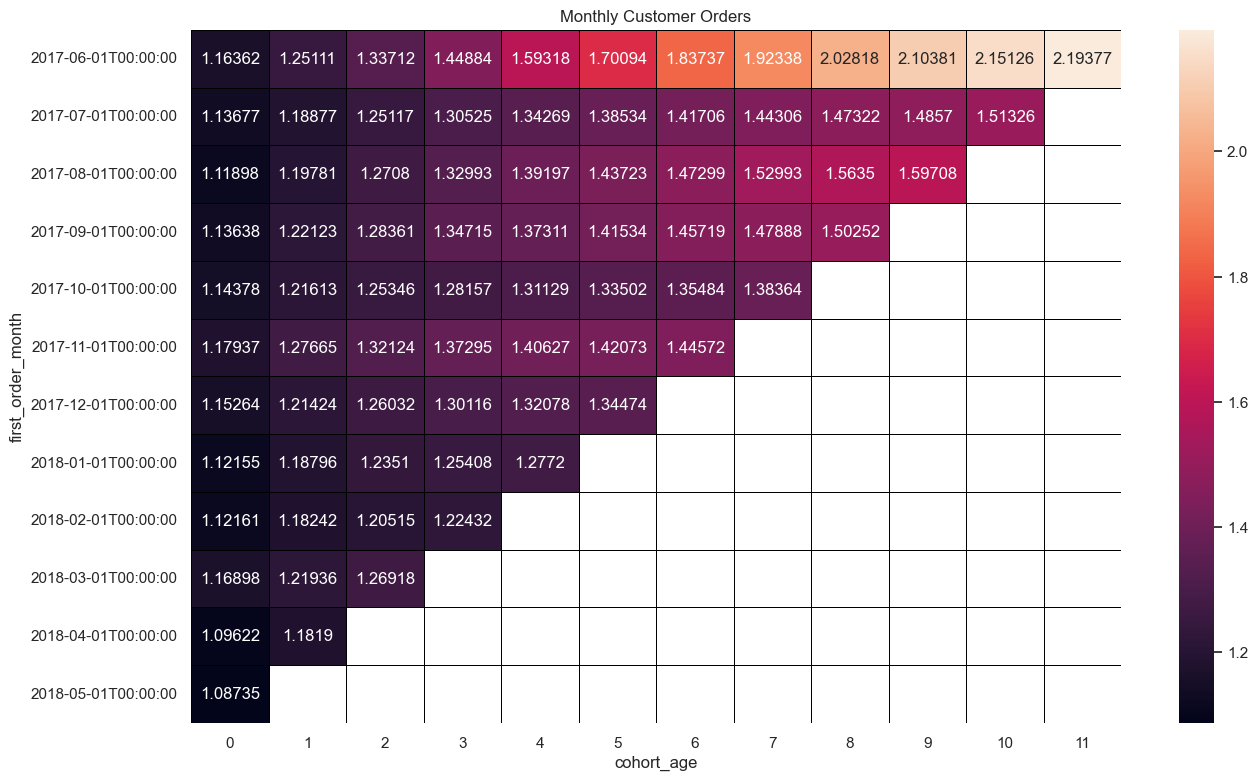

In [97]:
monthly_orders = buyers.pivot_table(index='first_order_month',
                                    columns='cohort_age',
                                    values='avg_number_of_orders',
                                    aggfunc='mean').cumsum(axis=1)

sns.set(style='white')
plt.figure(figsize=(15, 9))
plt.title('Monthly Customer Orders')
sns.heatmap(monthly_orders,
            annot=True,
            fmt='g',
            linewidths=0.5,
            linecolor='black')
plt.show()

Based on the heatmap it shows that the after each cohort's first order most customers within that cohort come back to order again within 12 months. This is seen especially so in the first cohort as on average every customer came back at least once more within 12 months.

[Back to Table of Contents](#back)

##### Customer long term value

To find the ltv first we need to find the number of unique monthly users

To get the cohort size we need to count all unique user id values from the first order months

In [98]:
ltv_size = buyers.groupby('first_order_month').agg({'uid':'nunique'}).reset_index()

Then we name the column and merge it to the buyers dataframe

In [99]:
ltv_size.columns = ['first_order_month','n_buyers']

In [100]:
buyers = buyers.merge(ltv_size, on='first_order_month')

To calculate the long term value we divide the revenue by the number of buyers

In [101]:
buyers['ltv'] = buyers['revenue'] / buyers['n_buyers']

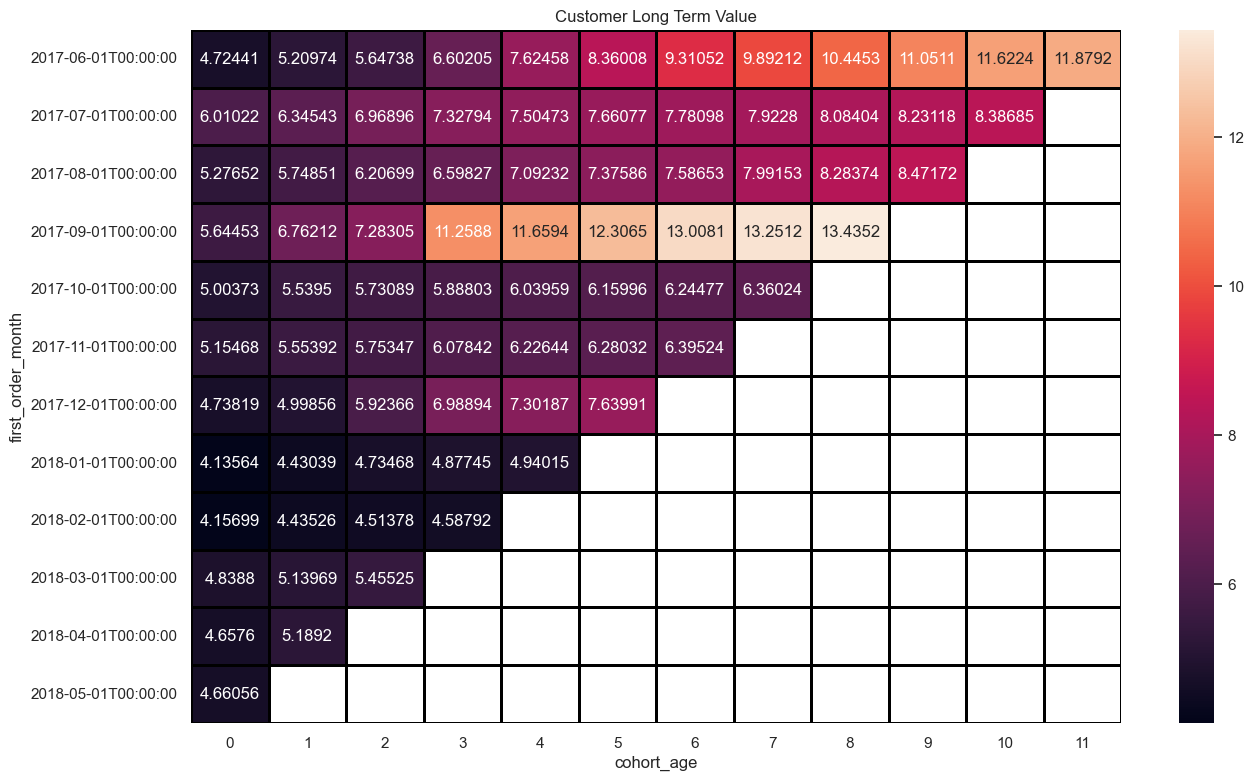

In [102]:
ltv_pivot = buyers.pivot_table(index='first_order_month',
                               columns='cohort_age',
                               values='ltv',
                               aggfunc='sum').cumsum(axis=1)

sns.set(style='white')
plt.figure(figsize=(15, 9))
plt.title('Customer Long Term Value')
sns.heatmap(ltv_pivot,
            annot=True,
            fmt='g',
            linewidths=1,
            linecolor='black')
plt.show()

This heatmap reiterates that many cohorts do not reach ltv maturity until the third month. After the third month, the customer's ltv increases quickly.

[Back to Table of Contents](#back)

### Marketing

##### Total marketing cost

In [103]:
print('Total marketing cost:', costs['costs'].sum())

Total marketing cost: 329131.62


The total marketing cost for the 12 month period comes out to $329,132

[Back to Table of Contents](#back)

##### Marketings cost per source

In [104]:
cost_by_source = costs.groupby('source_id').agg({'costs':'sum'})

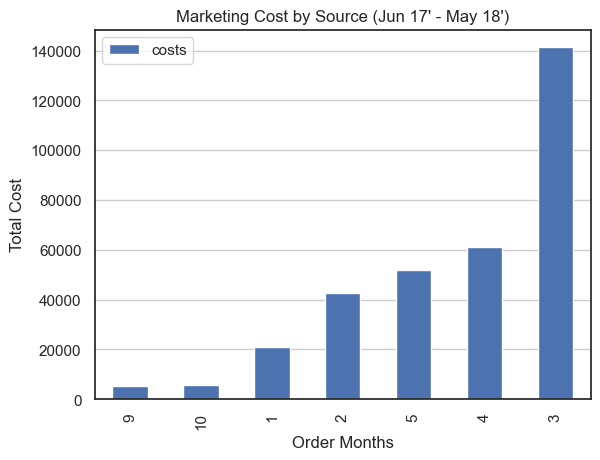

In [105]:
cost_by_source.sort_values('costs').plot(kind='bar',
                                         title='Marketing Cost by Source (Jun 17\' - May 18\')', 
                                         xlabel='Order Months',
                                         ylabel='Total Cost')
plt.grid(axis='y')
plt.show()

According to the cost data, source 3 was the most funded marketing source and source 9 and 10 were the least funded marketing source. It is also worth noting that sources 6-8 were not shown and so those sources should be cut or looked into more on why they were not used.

[Back to Table of Contents](#back)

##### Marketing cost per source over time

Fist, we need to group the timeframe into months and change it back into a datetime for our graph index

In [106]:
costs['month'] = costs['dt'].values.astype('datetime64[M]')

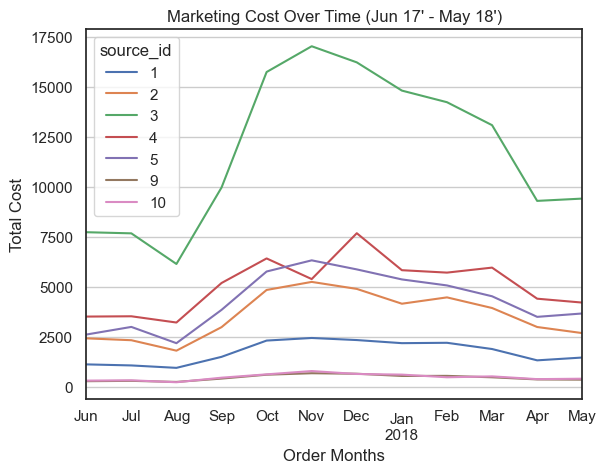

In [107]:
costs.pivot_table(index='month',
                  columns='source_id',
                  values ='costs',
                  aggfunc='sum').plot(title='Marketing Cost Over Time (Jun 17\' - May 18\')',
                                      xlabel='Order Months',
                                      ylabel='Total Cost')
plt.grid(axis='y')
plt.show()

Based on the chart, we have spent the most on source 3 than all other sources and spent the least on sources 9 and 10.

[Back to Table of Contents](#back)

#### Customer acquisition cost per source

To find the customer acquisition cost for each source we need to find the first instances of each users first source

In [108]:
sources = visits_log_us.sort_values(by=['uid','start_ts']).groupby('uid').agg({'source_id':'first'}).reset_index()

In [109]:
sources.columns = ['uid','first_source']

Then we need to find the customers first order date and time

In [110]:
buyers_ = orders_log_us.groupby('uid').agg({'buy_ts':'min'}).reset_index()

In [111]:
buyers_ = buyers_.merge(sources, on='uid')

Now we can find the total cost of each source per month

In [112]:
costs_by_month_source = costs.groupby(['month','source_id'])['costs'].sum().reset_index()

In [113]:
buyers_['month'] = buyers_['buy_ts'].values.astype('datetime64[M]')

Next, we find the total of unique user ids per source for each month

In [114]:
buyers_per_month_source = buyers_.groupby(['month','first_source'])['uid'].nunique().reset_index()

In [115]:
buyers_per_month_source = buyers_per_month_source.rename(columns={'first_source':'source_id'})

In [116]:
res = costs_by_month_source.merge(buyers_per_month_source, how='left', on=['month','source_id'])

Lastly, we store all of variables in the res dataframe and calculate for customer acquisition cost

In [117]:
res['cac'] = res['costs'] / res['uid']

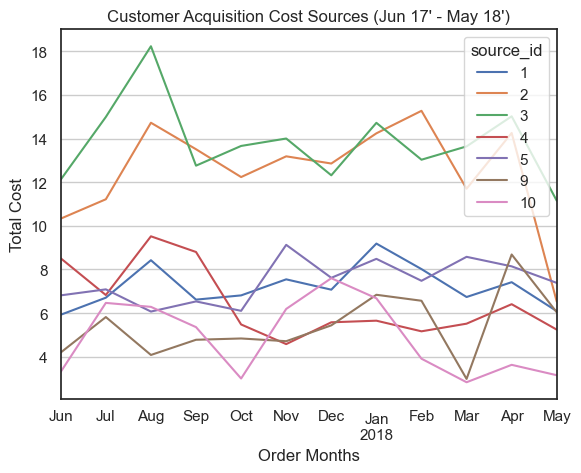

In [118]:
res.pivot_table(index='month',
                columns= 'source_id',
                values= 'cac').plot(title='Customer Acquisition Cost Sources (Jun 17\' - May 18\')',
                                    xlabel='Order Months',
                                    ylabel='Total Cost')
plt.grid(axis='y')
plt.show()

Based on the graph it shows the customer acquisition cost graph, it shows that source 2 and 3 are the most expensive sources used to acquire users. However, towards the end of the recorded timeframe, source from source 2 cost to acquire users sharply decreased to the average of the sources 1, 4, 5, and 9. 

[Back to Table of Contents](#back)

#### Return on marketing investment

Calculating the cost of acquisition

In [119]:
monthly_costs = costs.groupby('month').agg({'costs':'sum'}).reset_index()

In [120]:
buyers = pd.merge(buyers, monthly_costs, left_on='first_order_month', right_on='month')

In [121]:
buyers['cac'] = buyers['costs'] / buyers['n_buyers']

Calculating for return on marketing investment

In [122]:
buyers['romi'] = buyers['ltv'] / buyers['cac']

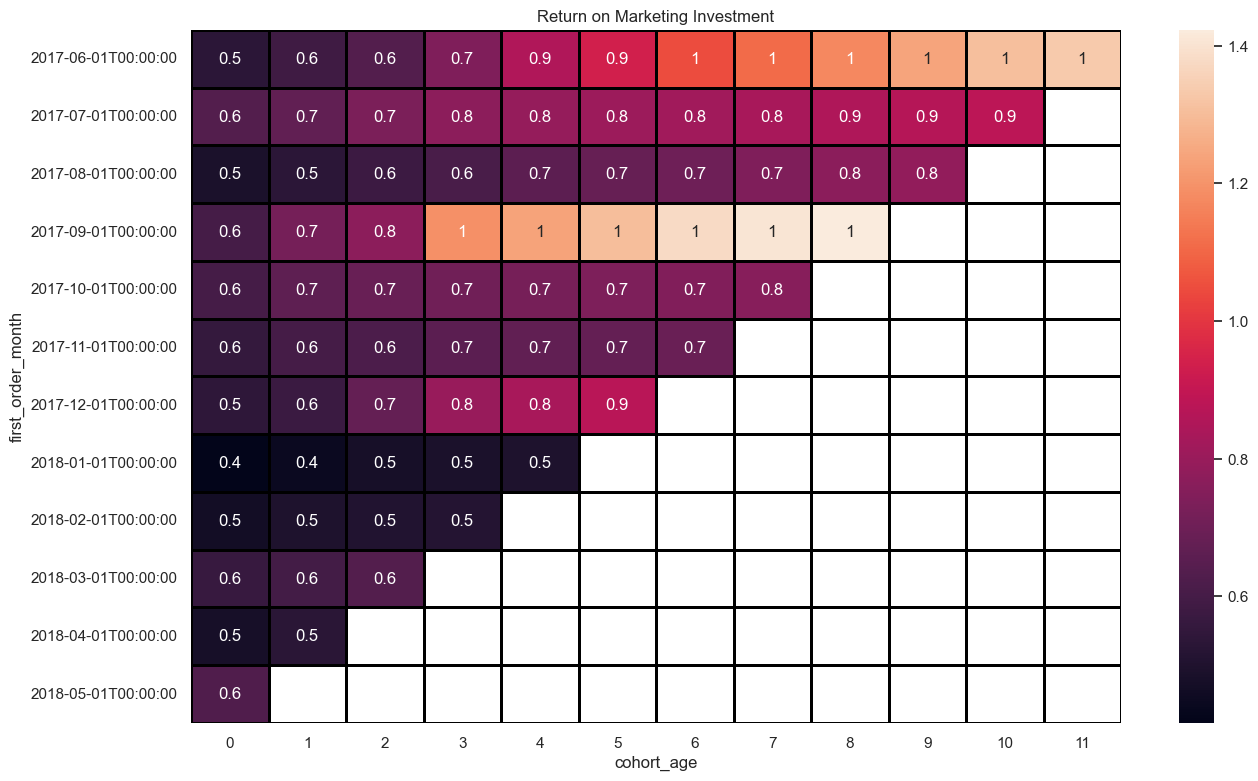

In [123]:
romi_pivot = buyers.pivot_table(index='first_order_month',
                                columns='cohort_age',
                                values='romi',
                                aggfunc='sum').cumsum(axis=1)
 
sns.set(style='white')
plt.figure(figsize=(15, 9))
plt.title('Return on Marketing Investment')
sns.heatmap(romi_pivot,
            annot=True,
            fmt='.0g',
            linewidths=1,
            linecolor='black')
plt.show()

Based on this heatmap and sample size, it shows that most of the 2017 cohorts are expecting to make a positive return going into the summer of 2018. This means it takes about a year for summer cohorts to make a positive romi. It should be noted that the September 17' and June 17' cohorts were unusually very strong cohorts making a positive romi within 12 months. From the current sample size, 2017 the Q3 and Q4 cohorts also saw the highest and quickest returns when compared to the cohorts that started in 2018. This shows that we should allocate most of our marketing budget to acquiring customers during the summer and fall as those customers are shown to spend during the holidays and well into Q1 of the next year. 

[Back to Table of Contents](#back)

## Conclusion

In conclusion, based on the limited sample size, I would recommend allocating more of the marketing budget to the sources that were used to acquire the summer 17' cohorts and the September 17' cohort. These cohorts tend to spend more going into the holiday season and more importantly continue to buy from us after the holiday season despite Q1 normally being the slowest quarter for sales. It should also be noted that many cohorts do not see a positive romi within this timeframe, however, given enough time most of them will eventually reach a positive romi. As we continue as a company LTV customer value will increase over multiple years as well as the ROMI for those cohorts. A customer's LTV only increases over a longer period as the initial acquisition cost is a one-time cost where the customer will keep coming back as long as they like our products/services. In conclusion, the marketing budget should allocate a large portion of the budget to acquire more customers from the summer 17' cohorts since these cohorts tend to have the quickest romi and provide high long-term value when compared to the other cohorts based on the current sample size. 

[Back to Table of Contents](#back)